In [1]:
# Import Libraries and Configure Matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import re
import collections
from matplotlib import cm
from matplotlib import colors
from pycirclize import Circos
from tqdm import tqdm


In [2]:

# Initialize Circos with a single sector for nl43 ΔΔE
sectors = {"nl43 ΔΔE": 263}
circos = Circos(sectors, space=0, start=0, end=340)

# Get the sector
sector = circos.get_sector("nl43 ΔΔE")

# Add outer track for the main arc
track1 = sector.add_track((96, 98))
track1.rect(0, 263, fc="grey", ec="grey", lw=1.0)

# Add ticks and labels
major_ticks_pos = list(range(0, 263, 10))
major_ticks_labels = [str(i+1) if (i+1) % 10 == 1 else "" for i in major_ticks_pos]
all_ticks_pos = list(range(0, 263, 1))
all_ticks_labels = None

track1.xticks(major_ticks_pos, major_ticks_labels, label_size=10, tick_length=2,outer=False)
track1.xticks(all_ticks_pos, all_ticks_labels, label_size=8, tick_length=1,outer=False)
# Load and Parse data file
pairs = []
values_all = []



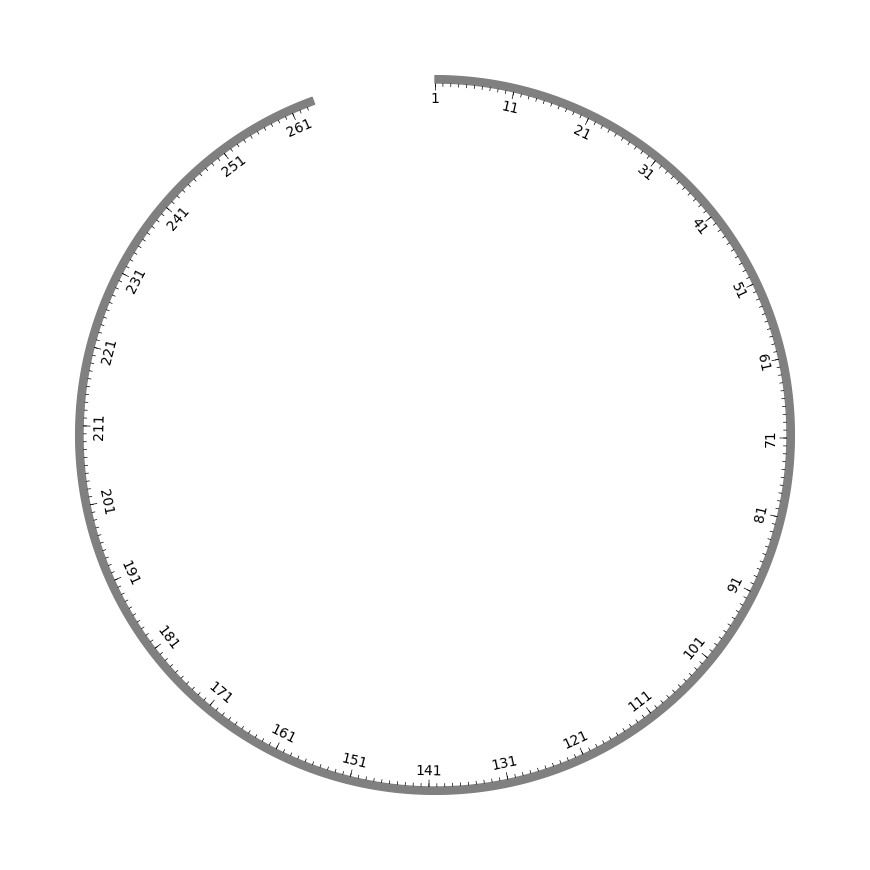

In [3]:
fig = circos.plotfig()
plt.show()

strictly follow the api of this exmple, for each position that has a mutaiton, annotate the specific drug and the drug resistant mutations it has:
    from pycirclize import Circos
from pycirclize.parser import Gff
from pycirclize.utils import load_prokaryote_example_file

gff_file = load_prokaryote_example_file("enterobacteria_phage.gff")
gff = Gff(gff_file)

seqid2size = gff.get_seqid2size()
space = 0 if len(seqid2size) == 1 else 2
circos = Circos(sectors=seqid2size, space=space)

seqid2features = gff.get_seqid2features(feature_type="CDS")
for sector in circos.sectors:
    track = sector.add_track((90, 100))
    track.axis(fc="#EEEEEE", ec="none")
    track.grid(2, color="black")

    features = seqid2features[sector.name]
    for feature in features:
        # Plot CDS feature
        if feature.location.strand == 1:
            track.genomic_features(feature, plotstyle="arrow", r_lim=(95, 100), fc="salmon")
        else:
            track.genomic_features(feature, plotstyle="arrow", r_lim=(90, 95), fc="skyblue")
        # Plot feature annotation label
        start, end = int(feature.location.start), int(feature.location.end)
        label_pos = (start + end) / 2
        label = feature.qualifiers.get("product", [""])[0]
        if label == "" or label.startswith("hypothetical"):
            continue
        track.annotate(label_pos, label, label_size=7)

fig = circos.plotfig()

use format: T66A/I/K drug: BIC, CAB, DTG, EVG, RAL

In [4]:
# Create dictionary for INSTI resistance mutations
insti_mutations = {
    "positions": [66, 92, 118, 138, 140, 143, 147, 148, 155, 263],
    "consensus": ["T", "E", "G", "E", "G", "Y", "S", "Q", "N", "R"],
    "drugs": {
        "Bictegravir (BIC)": ["K", "Q", "R", "KAT", "SAC", "", "", "HRK", "H", "K"],
        "Cabotegravir (CAB)": ["K", "Q", "R", "KAT", "SACR", "", "", "HRK", "H", "K"],
        "Dolutegravir (DTG)": ["K", "Q", "R", "KAT", "SAC", "", "", "HRK", "H", "K"],
        "Elvitegravir (EVG)": ["AIK", "Q", "R", "KAT", "SAC", "", "G", "HRK", "H", "K"],
        "Raltegravir (RAL)": ["AIK", "Q", "R", "KAT", "SAC", "RCH", "", "HRK", "H", "K"]
    }
}

print("INSTI Resistance Mutations Dictionary created:")
print(f"Positions: {insti_mutations['positions']}")
print(f"Consensus: {insti_mutations['consensus']}")
print("Drug-specific mutations:")
for drug, mutations in insti_mutations["drugs"].items():
    print(f"  {drug}: {mutations}")

INSTI Resistance Mutations Dictionary created:
Positions: [66, 92, 118, 138, 140, 143, 147, 148, 155, 263]
Consensus: ['T', 'E', 'G', 'E', 'G', 'Y', 'S', 'Q', 'N', 'R']
Drug-specific mutations:
  Bictegravir (BIC): ['K', 'Q', 'R', 'KAT', 'SAC', '', '', 'HRK', 'H', 'K']
  Cabotegravir (CAB): ['K', 'Q', 'R', 'KAT', 'SACR', '', '', 'HRK', 'H', 'K']
  Dolutegravir (DTG): ['K', 'Q', 'R', 'KAT', 'SAC', '', '', 'HRK', 'H', 'K']
  Elvitegravir (EVG): ['AIK', 'Q', 'R', 'KAT', 'SAC', '', 'G', 'HRK', 'H', 'K']
  Raltegravir (RAL): ['AIK', 'Q', 'R', 'KAT', 'SAC', 'RCH', '', 'HRK', 'H', 'K']


In [5]:
# Add annotation track for mutations
annotation_track = sector.add_track((90, 100))

# Annotate each mutation position with drug information
for i, pos in enumerate(insti_mutations["positions"]):
    circos_pos = pos - 1  # Convert to 0-based indexing
    consensus = insti_mutations["consensus"][i]
    
    # Find all drugs that have mutations at this position
    active_drugs = []
    for drug, mutations in insti_mutations["drugs"].items():
        if mutations[i] and mutations[i] != "":  # If there's a mutation for this drug at this position
            drug_abbrev = drug.split('(')[1].replace(')', '')
            active_drugs.append(drug_abbrev)
    
    if active_drugs:
        # Create label in format: T66A/I/K drug: BIC, CAB, DTG, EVG, RAL
        mutation_variants = insti_mutations["drugs"][list(insti_mutations["drugs"].keys())[0]][i]  # Get mutation variants from first drug
        for drug, mutations in insti_mutations["drugs"].items():
            if mutations[i] and mutations[i] != "":
                mutation_variants = mutations[i]
                break
        
        # Format mutations with slashes
        formatted_mutations = "/".join(list(mutation_variants)) if len(mutation_variants) > 1 else mutation_variants
        # label = f"{consensus}{pos}{formatted_mutations} "
        label = f"{consensus}{pos}"
        # drug: {', '.join(active_drugs)}"
        # Annotate the position
        annotation_track.annotate(circos_pos, label, label_size=13, shorten=100)

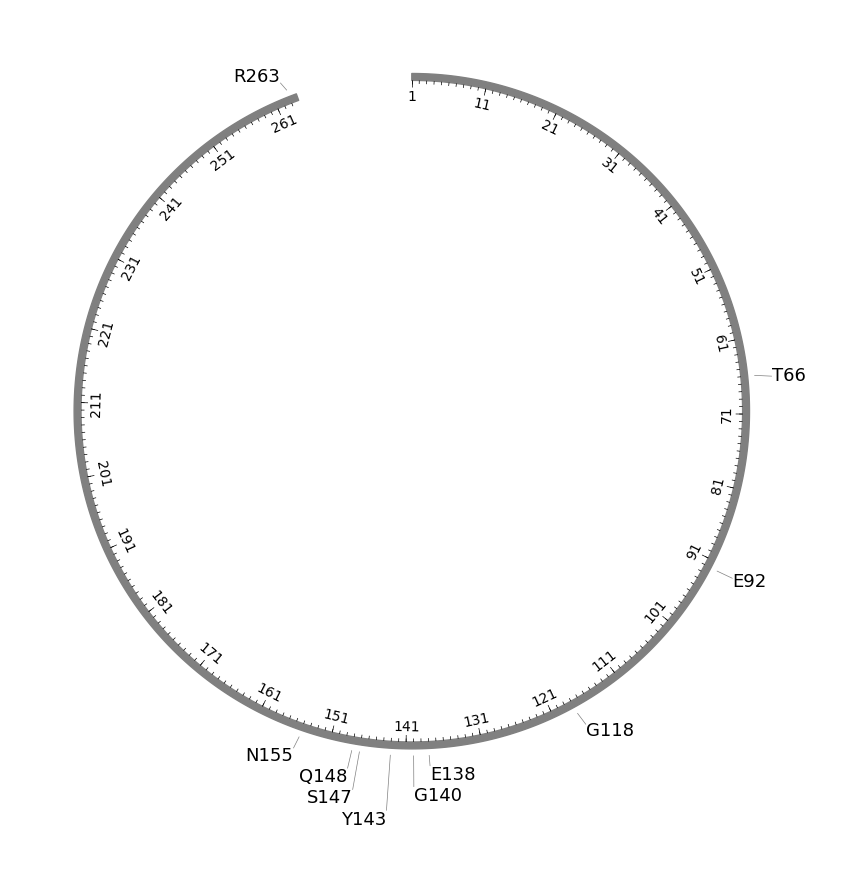

In [6]:
fig = circos.plotfig()
plt.show()

make a track that shows different segments with different colors as well as lablels: 1-50 as NTD, 50-212 as CCD, 212-end as CTD
add a tick track on top of this track, in each middle position, use tick label NTD, CCD and CTD like this: 
track1 = sector.add_track((98, 100))
track1.rect(0, 263, fc="grey", ec="grey", lw=1.0)

# Add ticks and labels
major_ticks_pos = list(range(0, 263, 10))
major_ticks_labels = [str(i+1) if (i+1) % 10 == 1 else "" for i in major_ticks_pos]
all_ticks_pos = list(range(0, 263, 1))
all_ticks_labels = None

track1.xticks(major_ticks_pos, major_ticks_labels, label_size=10)
track1.xticks(all_ticks_pos, all_ticks_labels, label_size=8)
# Load and Parse data file
pairs = []
values_all = []

read from in.uni4.npy, the file is in shape 263*4: 
[[1, 0, 0, 0],
 [0.0010070493444800377, 0.9989929795265198, 0, 0],
 [0.996834933757782, 0.0011509135365486145, 0.0010070493444800377, 0.0010070493444800377],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 ...]

 add a track with four grid each column on each position to display the heatmap. also include color grade bar 


read in from kn.her2.all, its in format: 
A1B-B2A 0.012168 -20.5323038958 -8.38054968975 -12.211337151
A1B-B2C -0.000907891 -16.4984526904 -8.38054968975 -8.17965538055
 first [0]column contains two mutations and location, second [1]column is the delta delta e for the two mutations 
 fourth [3]column is the single delta E for the first mutaiton, fifth[4] column is the single delta E for the second mutaiton

store the follwing two dictionarys: delta E for each position: 1: (should contain three values for three mutations (or you can use set operation on all the mutations with 1 and this will end up with only three values))
                                                                2: (should contain three values) 
                                                                3: so on
                                    delta delta Es for each two positions: []

In [7]:
# Initialize dictionaries to store delta E and delta delta E values
delta_e_per_position = collections.defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
delta_delta_e_per_pair = []

# Define mutation_map to map amino acids to indices
mutation_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Read the file and process the data
with open('kn.her2.all') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        
        columns = re.split(r'[,\t\s]+', line)
        mutations = columns[0]
        ddE = float(columns[1])
        delta_e1 = float(columns[3])
        delta_e2 = float(columns[4])
        
        # Extract positions from the mutation string
        positions = [int(pos) for pos in re.findall(r'\d+', mutations)]
        if len(positions) != 2:
            continue
        
        pos1, pos2 = positions
        
        #detect the wildtype 'first' aa seuqnce, and put A' delta e into [0]....D's delta e into [3]
        # Store delta E values for each position
        # Detect the wildtype 'first' amino acid sequence
        wildtype_aa1 = mutations[0]  # Extract the first amino acid from the mutation string
        wildtype_aa2 = mutations.split('-')[1][0]  # Extract the first letter after '-'
        mutate_aa1 = mutations[mutations.index('-') - 1]  # Extract the one letter before '-'
        mutate_aa2 = mutations[-1]
        # print(f"Processing mutation: {mutations}, Positions: {pos1}, {pos2}, Wildtype AAs: {wildtype_aa1}, {wildtype_aa2}, Mutated AA1: {mutate_aa1}, Mutated AA2: {mutate_aa2}")
        # Map the wildtype amino acid to the corresponding index in the delta_e_per_position list
        if mutate_aa1 in mutation_map:
            delta_e_per_position[pos1][mutation_map[mutate_aa1]] = delta_e1
        if mutate_aa2 in mutation_map:
            delta_e_per_position[pos2][mutation_map[mutate_aa2]] = delta_e2
        
        # Store delta delta E values for each pair of positions
        delta_delta_e_per_pair.append((pos1, pos2, ddE))


print("Delta E per position:")
for pos, values in delta_e_per_position.items():
    print(f"Position {pos}: {values}")

print("\nDelta Delta E per pair:")
for pair in delta_delta_e_per_pair[:10]:  # Print first 10 pairs for brevity
    print(pair)

Delta E per position:
Position 1: [0.0, -8.38054968975, -8.25988974422, -8.39492220245]
Position 2: [-12.211337151, 0.0, -8.17965538055, -8.33986726217]
Position 3: [0.0, -6.41973451525, -5.49322355539, -9.96717477869]
Position 4: [0.0, -8.36709472165, -8.3004519064, -8.35169317573]
Position 5: [0.0, -8.17220654339, -8.27075589634, -8.31584165618]
Position 6: [-9.06889346242, 0.0, -5.50562496949, -4.18481978937]
Position 7: [-5.98517650831, -5.61920403084, 0.0, -4.31459438428]
Position 8: [-8.27113418095, 0.0, -8.27854509838, -8.24168222211]
Position 9: [0.0, -9.04177383147, -8.32005050592, -8.229754081]
Position 10: [-9.37142550806, -3.09506198578, 0.0, -8.13631128939]
Position 11: [0.0, -1.0387032833, -7.74111969257, -7.73570646672]
Position 12: [-9.39522261359, 0.0, -8.37496166117, -8.32128112204]
Position 13: [0.0, -9.00118947774, -8.54242528137, -8.4419245841]
Position 14: [0.0, -2.12882483751, -7.94176133489, -7.84364479827]
Position 15: [-10.9412949849, -7.13887907099, 0.0, -8.1

save the delta_delta_e_per_pair into a tsv file of circos link plot format 

read in in.uni4.npy again, now for each row, get the second largest value index if its not 0, if second largest value is 0, index is None

In [8]:
# Read the data from the file again
data = np.load("in.uni4.npy")  # Shape: (263, 4)

# Get the second largest value index for each row
second_largest_indices = []
for row in data:
    sorted_indices = np.argsort(row)[::-1]  # Sort indices in descending order of values
    if row[sorted_indices[1]] > 0:  # Check if the second largest value is not 0
        second_largest_indices.append(sorted_indices[1])
    else:
        second_largest_indices.append(None)

# Print the result
print("Second largest value indices (or None if second largest is 0):")
print(second_largest_indices)

Second largest value indices (or None if second largest is 0):
[None, 0, 1, None, None, 2, 3, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, None, 0, 2, 1, 3, 2, 0, 0, 3, 1, None, 1, 0, 1, None, 0, 1, 1, 1, 0, 0, None, 2, 0, None, None, 3, None, None, None, 2, 0, 0, None, None, 1, 2, 1, 0, None, 0, 3, None, None, 0, None, None, 2, None, 3, 0, 0, 2, 3, 1, 1, 0, None, 1, None, 0, 0, None, 0, None, 2, None, None, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, None, 1, 2, None, 0, None, None, None, 1, 2, 1, 3, 0, 1, None, 1, None, 2, None, 0, 1, 1, 0, 0, 2, 1, 2, None, None, None, None, None, 1, 2, 1, 0, 0, 1, 3, 0, 2, 2, 1, None, None, 0, 1, None, 0, 1, None, 1, 2, 2, 0, 0, 2, None, 1, 2, 1, 2, 1, 0, None, 1, 1, 3, 1, 1, None, 0, None, None, 1, 2, None, 2, 0, 1, 0, None, None, 0, None, 0, 1, 0, None, None, None, 2, 0, 3, 1, None, 1, None, 2, 0, None, 1, 0, 0, 0, 0, 0, None, 1, 2, 1, None, 1, 1, 0, 0, 2, 0, 1, 3, 2, None, 1, 1, None, 0, None, 1, 0, 0, 3, None, 3, None, None, None, None, None, 2, None, 1, 

now filter delta_e_per_position with the indecies second_largest_indices, generate the list of delta e values at delta_e_per_position if the its not None, if its None, the delta e at that position would be 0

In [9]:
# Filter delta_e_per_position using second_largest_indices
filtered_delta_e_values = []

for pos, index in enumerate(second_largest_indices):
    if index is not None:
        # Retrieve the delta E value at the given position and index
        filtered_delta_e_values.append(delta_e_per_position[pos + 1][index])
    else:
        # If index is None, append 0
        filtered_delta_e_values.append(0.0)

# Print the filtered delta E values
print("Filtered delta E values:")
print(filtered_delta_e_values)

Filtered delta E values:
[0.0, -12.211337151, -6.41973451525, 0.0, 0.0, -5.50562496949, -4.31459438428, -8.27113418095, -9.04177383147, -3.09506198578, -1.0387032833, -9.39522261359, -9.00118947774, -2.12882483751, -7.13887907099, -8.9701155303, -1.34657063428, -8.00318216719, 0.0, -4.00780334137, -4.31320634019, -8.91817113291, -5.09892659262, -3.13550916873, -5.3073832728, -9.4862676654, -5.41486975783, -1.50578114763, 0.0, -6.9401897341, -1.56809577346, -4.03903197683, 0.0, -7.38193829916, -9.7448109854, -8.42332355678, -6.54413261265, -8.29408478364, -4.2870167233, 0.0, -4.64966047648, -10.4058949817, 0.0, 0.0, -6.09882504866, 0.0, 0.0, 0.0, -7.84955568798, -1.11552172527, -6.14997570589, 0.0, 0.0, -5.09251717664, -10.1019327957, -6.23559216037, -5.7162075825, 0.0, -8.94284297712, -8.56507183984, 0.0, 0.0, -8.20420855563, 0.0, 0.0, -5.80064939708, 0.0, -9.01941024046, -12.6810347214, -11.1951715667, -8.59702534601, 0.0, -8.28978311643, -4.30281910114, -6.26184577867, 0.0, -3.245103

In [10]:
delta_e_per_position

defaultdict(<function __main__.<lambda>()>,
            {1: [0.0, -8.38054968975, -8.25988974422, -8.39492220245],
             2: [-12.211337151, 0.0, -8.17965538055, -8.33986726217],
             3: [0.0, -6.41973451525, -5.49322355539, -9.96717477869],
             4: [0.0, -8.36709472165, -8.3004519064, -8.35169317573],
             5: [0.0, -8.17220654339, -8.27075589634, -8.31584165618],
             6: [-9.06889346242, 0.0, -5.50562496949, -4.18481978937],
             7: [-5.98517650831, -5.61920403084, 0.0, -4.31459438428],
             8: [-8.27113418095, 0.0, -8.27854509838, -8.24168222211],
             9: [0.0, -9.04177383147, -8.32005050592, -8.229754081],
             10: [-9.37142550806, -3.09506198578, 0.0, -8.13631128939],
             11: [0.0, -1.0387032833, -7.74111969257, -7.73570646672],
             12: [-9.39522261359, 0.0, -8.37496166117, -8.32128112204],
             13: [0.0, -9.00118947774, -8.54242528137, -8.4419245841],
             14: [0.0, -2.128824837

In [11]:
print(len(filtered_delta_e_values))

263


now similar to this, but i not only want the second most sigificant. create a dictionary that has all positions as keys, alist as values, for each position, add the each delta_e_per_position value to the list if it is 1. not most frequent 2. the corrosponding amino acid's position's frequency in in.uni4.npy is >=0.00082

In [12]:
# Create a dictionary to store the filtered delta E values for each position
filtered_delta_e_dict = collections.defaultdict(list)

# Iterate through each position and its corresponding row in the data
for pos, row in enumerate(data, start=1):
    # Get the sorted indices of the row in descending order of frequency
    sorted_indices = np.argsort(row)[::-1]
    
    # Skip the most frequent amino acid (index 0 in sorted_indices)
    for index in sorted_indices[1:]:
        # Check if the frequency is >= 0.00082
        if row[index] >= 0.00082:
            # Add the delta E value to the dictionary for this position
            filtered_delta_e_dict[pos].append(delta_e_per_position[pos][index])

# Print the filtered delta E dictionary
print("Filtered delta E dictionary:")
for pos, values in filtered_delta_e_dict.items():
    print(f"Position {pos}: {values}")

Filtered delta E dictionary:
Position 2: [-12.211337151]
Position 3: [-6.41973451525, -9.96717477869, -5.49322355539]
Position 6: [-5.50562496949, -4.18481978937, -9.06889346242]
Position 7: [-4.31459438428, -5.98517650831, -5.61920403084]
Position 9: [-9.04177383147]
Position 10: [-3.09506198578, -9.37142550806]
Position 11: [-1.0387032833]
Position 12: [-9.39522261359]
Position 13: [-9.00118947774]
Position 14: [-2.12882483751]
Position 15: [-7.13887907099, -10.9412949849]
Position 16: [-8.9701155303, -7.0715254629]
Position 17: [-1.34657063428, -5.77260086522, -5.54964998318]
Position 18: [-8.00318216719]
Position 20: [-4.00780334137]
Position 21: [-4.31320634019, -3.875179586]
Position 22: [-8.91817113291, -9.698800629]
Position 23: [-5.09892659262, -7.88196069095, -12.3072545193]
Position 24: [-3.13550916873, -3.92607738171, -7.94663539017]
Position 25: [-5.3073832728]
Position 26: [-9.4862676654]
Position 27: [-5.41486975783, -9.75726167986, -8.67579891626]
Position 28: [-1.50578

In [13]:
# Find the largest and smallest values in filtered_delta_e_dict
largest_value = max(max(values) for values in filtered_delta_e_dict.values() if values)
smallest_value = min(min(values) for values in filtered_delta_e_dict.values() if values)

print(f"Largest value in filtered_delta_e_dict: {largest_value}")
print(f"Smallest value in filtered_delta_e_dict: {smallest_value}")

Largest value in filtered_delta_e_dict: 1.38276502956
Smallest value in filtered_delta_e_dict: -14.1431021132


now add in a line track with the above filtered_delta_e_values, and color the areas like this code example:

from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track = sector.add_track((80, 100), r_pad_ratio=0.1)
    track.axis()
    track.xticks_by_interval(1)
    vmin, vmax = 0, 10
    # Line between start-end two points
    track.line([track.start, track.end], [vmin, vmax], lw=1.5, ls="dotted")
    # Line of random value points
    x = np.linspace(track.start, track.end, int(track.size) * 5 + 1)
    y = np.random.randint(vmin, vmax, len(x))
    track.line(x, y)
fig = circos.plotfig()


C:\Users\xuech\AppData\Local\Temp\ipykernel_77860\2039818152.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter_cmap_positive = cm.get_cmap("Blues")
C:\Users\xuech\AppData\Local\Temp\ipykernel_77860\2039818152.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter_cmap_negative = cm.get_cmap("Reds_r")


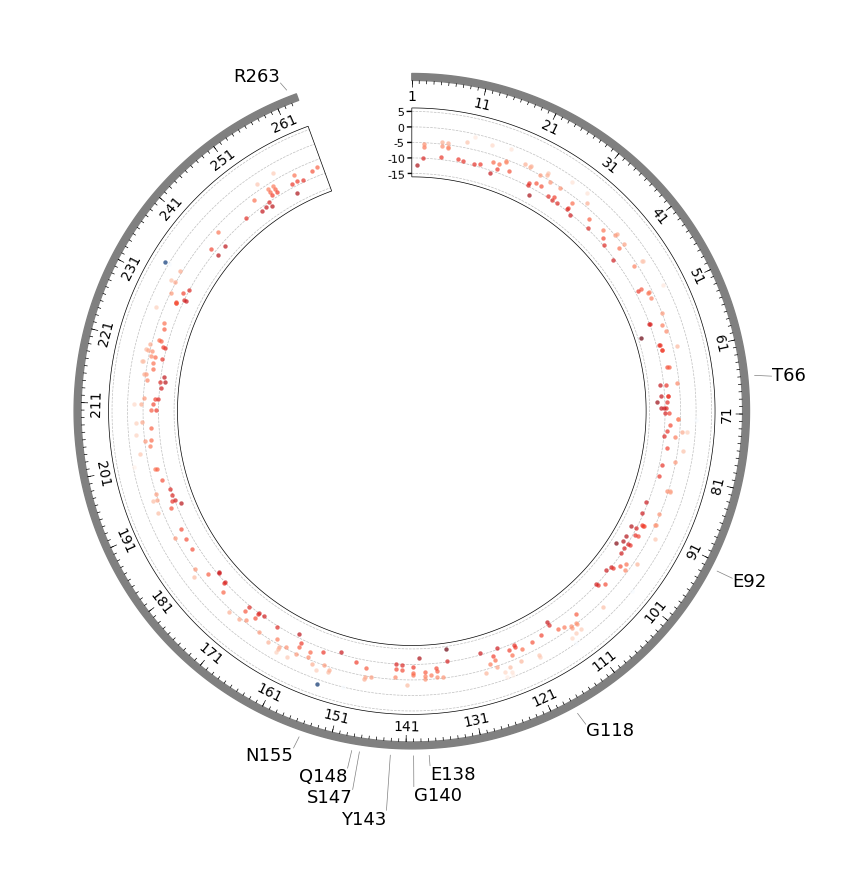

In [14]:
# Add a line track for filtered_delta_e_values
line_track = sector.add_track((68, 88), r_pad_ratio=0.1)
line_track.axis()
# Add scatter plot for delta_e_per_position
# Configure axis and ticks
line_track.yticks(
    [0, 5, 10, 15, 20],  # Positions
    ["-15","-10","-5", "0", "5"],  # Labels
    side="left",
    line_kws=dict(color="black", lw=1),
    text_kws=dict(color="black", size=8)
)

# Add grid lines for the values
line_track.grid(
    y_grid_num=5,  # Number of grid lines
    color="grey",
    lw=0.5,
    ls="--"
)

# # Plot the filtered delta E values as a line
# x_positions = np.arange(1, len(filtered_delta_e_values) + 1)  # X-axis positions
# line_track.line(x_positions, filtered_delta_e_values, lw=1.5, color="blue")

# # Add color-filled areas based on the values
# for i in range(len(filtered_delta_e_values) - 1):
#     x = [x_positions[i], x_positions[i + 1], x_positions[i + 1], x_positions[i]]
#     y = [0, 0, filtered_delta_e_values[i + 1], filtered_delta_e_values[i]]
#     color = "red" if filtered_delta_e_values[i] < 0 else "green"
#     line_track.fill(x, y, fc=color, ec="none", alpha=0.5)

# Plot all the delta E values from filtered_delta_e_dict
# Define the color map for the scatter plot
scatter_cmap_positive = cm.get_cmap("Blues")
scatter_cmap_negative = cm.get_cmap("Reds_r")
scatter_norm_positive = colors.Normalize(vmin=0, vmax=largest_value)
scatter_norm_negative = colors.Normalize(vmin=smallest_value, vmax=0)

for x_key, y_values in filtered_delta_e_dict.items():
    # Add 15 to each y value and plot it on the grid
    for y_value in y_values:
        if y_value >= 0:
            adjusted_color = scatter_cmap_positive(scatter_norm_positive(y_value))
        else:
            adjusted_color = scatter_cmap_negative(scatter_norm_negative(y_value))
        line_track.scatter([x_key-1], [(y_value + 15)], vmax=20, s=10, color=adjusted_color, alpha=0.7)

fig = circos.plotfig()
plt.show()


with data from delta_delta_e_per_pair, add a track of cytoband (0-40) connect all the positions with delta delta e value >5.5 or dde <2 colored with color scheme PiYG 

use api from this example, code should be different:

from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset

# Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/hg38)
chr_bed_file, cytoband_file, chr_links = load_eukaryote_example_dataset("hg38")

# Initialize Circos from BED chromosomes
circos = Circos.initialize_from_bed(chr_bed_file, space=3)
circos.text("Homo sapiens\n(hg38)", deg=315, r=150, size=12)

# Add cytoband tracks from cytoband file
circos.add_cytoband_tracks((95, 100), cytoband_file)

# Create chromosome color dict
ColorCycler.set_cmap("hsv")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

# Plot chromosome name & xticks
for sector in circos.sectors:
    sector.text(sector.name, r=120, size=10, color=chr_name2color[sector.name])
    sector.get_track("cytoband").xticks_by_interval(
        40000000,
        label_size=8,
        label_orientation="vertical",
        label_formatter=lambda v: f"{v / 1000000:.0f} Mb",
    )

# Plot chromosome link
for link in chr_links:
    region1 = (link.query_chr, link.query_start, link.query_end)
    region2 = (link.ref_chr, link.ref_start, link.ref_end)
    color = chr_name2color[link.query_chr]
    if link.query_chr in ("chr1", "chr8", "chr16") and link.query_chr != link.ref_chr:
        circos.link(region1, region2, color=color)

fig = circos.plotfig()

C:\Users\xuech\AppData\Local\Temp\ipykernel_77860\3214993979.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  chord_cmap = cm.get_cmap("PiYG")
Processing chords: 100%|██████████| 310077/310077 [00:00<00:00, 2449989.26it/s]


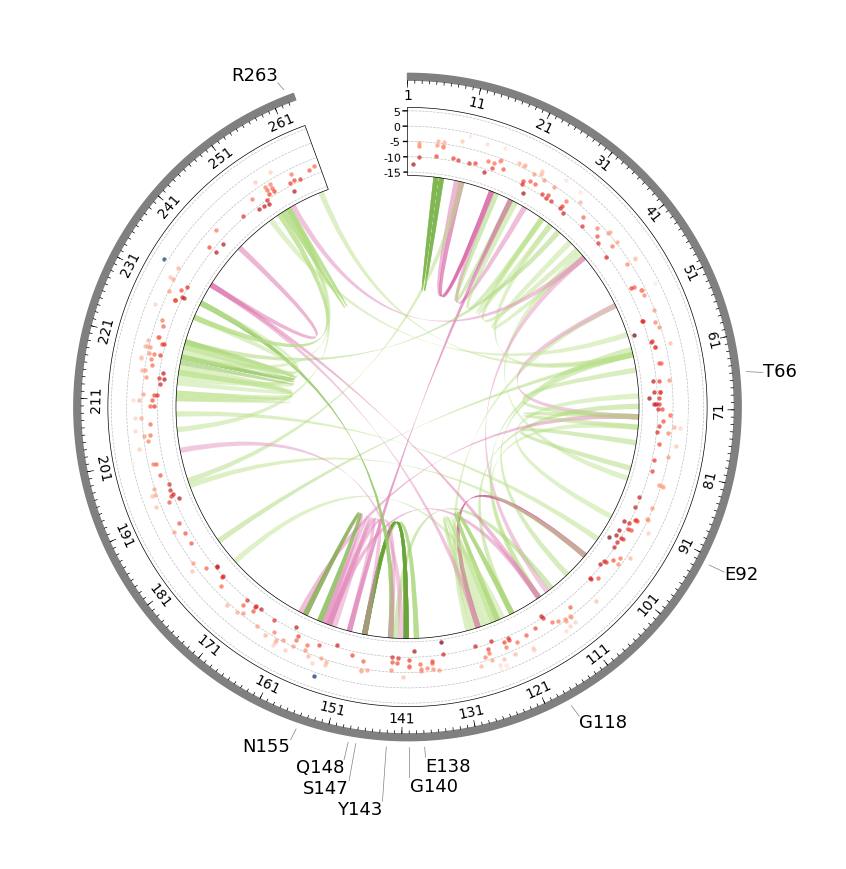

In [15]:
# Add a track for the chords spanning 0-40
# chord_track = sector.add_track((0, 40))

# Define the color map for the chords
chord_cmap = cm.get_cmap("PiYG")
chord_norm = colors.Normalize(vmin=-8.50879, vmax=8.50879)

# Filter and add chords for delta delta E values > 5.5 or < -2
for pos1, pos2, dde in tqdm(delta_delta_e_per_pair, desc="Processing chords"):
    if dde > 3 or dde < -2.15:
        # Define regions for the chord
        region1 = ("nl43 ΔΔE", pos1 - 1, pos1)  # Convert to 0-based indexing
        region2 = ("nl43 ΔΔE", pos2 - 1, pos2)  # Convert to 0-based indexing
        # Map the delta delta E value to a color
        if dde< 0:
            color = chord_cmap(chord_norm(dde*2))
        else:
            color = chord_cmap(chord_norm(dde))
        # Add the chord to the circos plot
        circos.link(region1, region2, color=color)

        # Add a color bar for the chords
# Add a color bar for the chords
chord_mappable = cm.ScalarMappable(norm=chord_norm, cmap=chord_cmap)
fig = circos.plotfig()  # Ensure fig is initialized before adding the color bar
# plt.colorbar(chord_mappable, ax=fig.axes[0], label="Delta Delta E Values", shrink=0.5)
# # Plot the figure
# fig = circos.plotfig()
# plt.show()



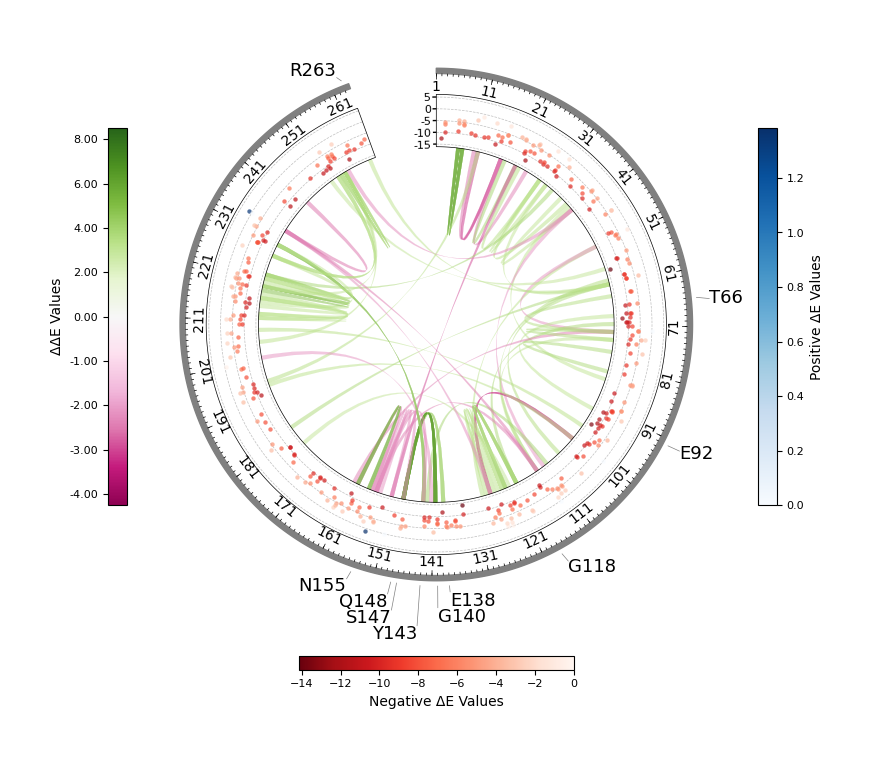

In [16]:
# Add color bars to the Circos graph
fig = circos.plotfig()

# Ensure chord_norm is defined
# chord_norm = colors.Normalize(vmin=-3.18745, vmax=8.50879)
chord_norm = colors.Normalize(vmin=-8.50879, vmax=8.50879)

# Add the delta delta E color bar on the left
delta_delta_e_mappable = cm.ScalarMappable(norm=chord_norm, cmap=chord_cmap)
cbar1 = plt.colorbar(delta_delta_e_mappable, ax=fig.axes[0], orientation="vertical", fraction=0.05, pad=0.05, location="left", shrink=0.5)
cbar1.set_label("ΔΔE Values", fontsize=10)
cbar1.ax.tick_params(labelsize=8)

tick_labels = cbar1.get_ticks()
# print(f"Original tick labels: {tick_labels}")
new_tick_labels = [tick / 2 if tick < 0 else tick for tick in tick_labels]
cbar1.set_ticks(tick_labels[1:-1])  # Drop the first and last tick labels (-10 and 10)
cbar1.set_ticklabels([f"{label:.2f}" for label in new_tick_labels[1:-1]])


# Show the updated Circos graph with color bars
# Add the positive scatter color bar on the right
scatter_positive_mappable = cm.ScalarMappable(norm=scatter_norm_positive, cmap=scatter_cmap_positive)
cbar2 = plt.colorbar(scatter_positive_mappable, ax=fig.axes[0], orientation="vertical", fraction=0.05, pad=0.075, location="right", shrink=0.5)
cbar2.set_label("Positive ΔE Values", fontsize=10)
cbar2.ax.tick_params(labelsize=8)

# Add the negative scatter color bar on the bottom
scatter_negative_mappable = cm.ScalarMappable(norm=scatter_norm_negative, cmap=scatter_cmap_negative)
cbar3 = plt.colorbar(scatter_negative_mappable, ax=fig.axes[0], orientation="horizontal", fraction=0.05, pad=0.0755, location="bottom", shrink=0.5)
cbar3.set_label("Negative ΔE Values", fontsize=10)
cbar3.ax.tick_params(labelsize=8)
plt.show()

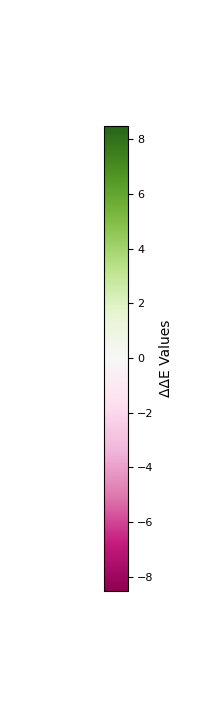

In [21]:
# Create a new figure for the color bars
fig, ax = plt.subplots(figsize=(1, 8))

# Hide the axes
ax.axis("off")

# Add the delta delta E color bar
delta_delta_e_mappable = cm.ScalarMappable(norm=chord_norm, cmap=chord_cmap)
cbar1 = plt.colorbar(delta_delta_e_mappable, ax=ax, orientation="vertical", fraction=0.3, pad=0.05)
cbar1.set_label("ΔΔE Values", fontsize=10)
cbar1.ax.tick_params(labelsize=8)

# # Add the positive scatter color bar
# scatter_positive_mappable = cm.ScalarMappable(norm=scatter_norm_positive, cmap=scatter_cmap_positive)
# cbar2 = plt.colorbar(scatter_positive_mappable, ax=ax, orientation="vertical", fraction=0.3, pad=0.25)
# cbar2.set_label("Positive ΔE Values", fontsize=10)
# cbar2.ax.tick_params(labelsize=8)

# # Add the negative scatter color bar
# scatter_negative_mappable = cm.ScalarMappable(norm=scatter_norm_negative, cmap=scatter_cmap_negative)
# cbar3 = plt.colorbar(scatter_negative_mappable, ax=ax, orientation="vertical", fraction=0.3, pad=0.45)
# cbar3.set_label("Negative ΔE Values", fontsize=10)
# cbar3.ax.tick_params(labelsize=8)

plt.show()

add the above negative de and positive de graphs together, but shrik the length of the positive de colormap length by 10 times

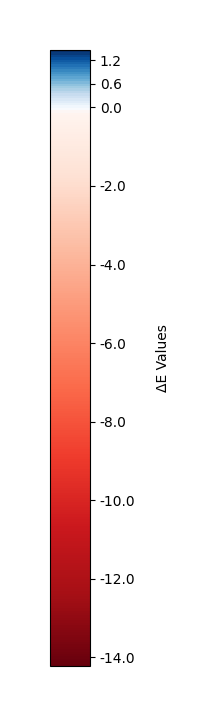

In [23]:
# Same setup as before but with vertical orientation and slimmer bar

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def shifted_cmap(cmap_neg, cmap_pos, vmin, vmax, vcenter, name="shiftedcmap"):
    """Create a shifted diverging colormap with two different cmaps."""
    midpoint = (vcenter - vmin) / (vmax - vmin)
    cdict = {"red": [], "green": [], "blue": []}

    # Negative side
    reg_index_neg = np.linspace(0, 1, 128, endpoint=False)
    shift_index_neg = np.linspace(0.0, midpoint, 128, endpoint=False)
    for ri, si in zip(reg_index_neg, shift_index_neg):
        r, g, b, _ = cmap_neg(ri)
        cdict["red"].append((si, r, r))
        cdict["green"].append((si, g, g))
        cdict["blue"].append((si, b, b))

    # Positive side
    reg_index_pos = np.linspace(0, 1, 129, endpoint=True)
    shift_index_pos = np.linspace(midpoint, 1.0, 129, endpoint=True)
    for ri, si in zip(reg_index_pos, shift_index_pos):
        r, g, b, _ = cmap_pos(ri)
        cdict["red"].append((si, r, r))
        cdict["green"].append((si, g, g))
        cdict["blue"].append((si, b, b))

    newcmap = mpl.colors.LinearSegmentedColormap(name, cdict)
    return newcmap


# Original values from filtered_delta_e_dict
data_min = -14.1431021132
data_max = 1.38276502956

# Add 0.5% padding
padding = 0.005 * (data_max - data_min)
vmin = data_min - padding
vmax = data_max + padding
vcenter = 0

# Tick positions (unchanged)
neg_ticks = np.array([-14, -12, -10, -8, -6, -4, -2, 0])
pos_ticks = np.array([0.6, 1.2])
all_ticks = np.concatenate([neg_ticks, pos_ticks])

# Build shifted cmap with Reds_r and Blues
cmap = shifted_cmap(plt.cm.Reds_r, plt.cm.Blues, vmin, vmax, vcenter)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Plot with vertical orientation and slimmer bar
fig, ax = plt.subplots(figsize=(1, 8))
fig.subplots_adjust(left=0.5)

cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation="vertical")
cb.set_ticks(all_ticks)
cb.set_ticklabels([str(t) for t in all_ticks])

cb.set_label("ΔE Values", rotation=90, labelpad=15)
plt.show()



combine the two above color bar dde and de together, but unify the label sizes, paddings and colormap size



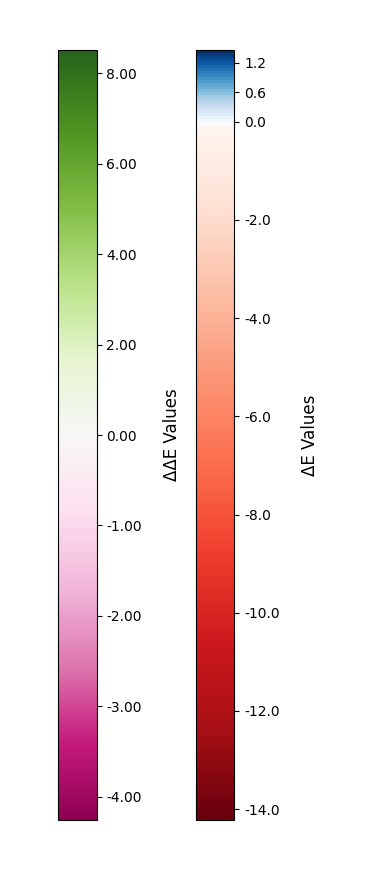

In [30]:
# Create a combined color bar figure with unified delta delta E and delta E
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3, 8))
fig.subplots_adjust(wspace=0.8)  # Add padding between the two color bars

# Hide the axes
ax1.axis("off")
ax2.axis("off")

# Add the delta delta E color bar
delta_delta_e_mappable = cm.ScalarMappable(norm=chord_norm, cmap=chord_cmap)
cbar1 = plt.colorbar(delta_delta_e_mappable, ax=ax1, orientation="vertical", fraction=1.5, pad=0.1)
cbar1.set_label("ΔΔE Values", fontsize=12, labelpad=15)
cbar1.ax.tick_params(labelsize=10)

# Adjust tick labels for delta delta E
tick_labels = cbar1.get_ticks()
new_tick_labels = [tick / 2 if tick < 0 else tick for tick in tick_labels]
cbar1.set_ticks(tick_labels[1:-1])
cbar1.set_ticklabels([f"{label:.2f}" for label in new_tick_labels[1:-1]])

# Add the unified delta E color bar using the shifted colormap
cb_unified = plt.colorbar(
    cm.ScalarMappable(norm=norm, cmap=cmap), 
    ax=ax2, 
    orientation="vertical", 
    fraction=1.5, 
    pad=0.1
)
cb_unified.set_ticks(all_ticks)
cb_unified.set_ticklabels([str(t) for t in all_ticks])
cb_unified.set_label("ΔE Values", fontsize=12, labelpad=15)
cb_unified.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()